In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('D:/Github/machine learning/Kaggle/House Prices/train.csv')
test = pd.read_csv('D:/Github/machine learning/Kaggle/House Prices/test.csv')

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
NAs=pd.concat([train.isnull().sum(),test.isnull().sum()],axis=1, keys=['Train','Test'])
NAs[NAs.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [4]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

#Show scores for train and validation sets
def train_test(estimator,x_trn,x_tst,y_trn,y_tst):
    prediction_train = estimator.predict(x_trn)
    print(estimator)
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    print("Test")
    get_score(prediction_test, y_tst)
    

In [5]:
#split features and labels, and delete unused variables

train_labels=train.pop('SalePrice')

features=pd.concat([train,test],keys=['train','test'])

# for those features where NA are more than half, it's better to remove them
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [6]:
#Fill NAs and converting features

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [7]:
# MSZoning NA in pred. filling with most popular values
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

# LotFrontage  NA in all. I suppose NA means 0
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

# Alley  NA in all. NA means no access
features['Alley'] = features['Alley'].fillna('NOACCESS')

# Converting OverallCond to str
features.OverallCond = features.OverallCond.astype(str)

# MasVnrType NA in all. filling with most popular values
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('NoBSMT')

# TotalBsmtSF  NA in pred. I suppose NA means 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

# KitchenAbvGr to categorical
features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

# KitchenQual NA in pred. filling with most popular values
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    features[col] = features[col].fillna('NoGRG')

# GarageCars  NA in pred. I suppose NA means 0
features['GarageCars'] = features['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# Year and Month to categorical
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

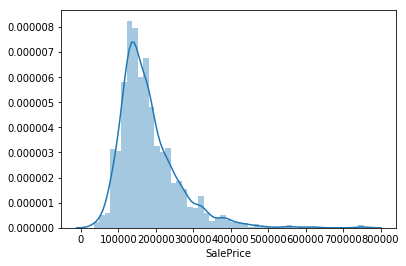

In [8]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(train_labels)

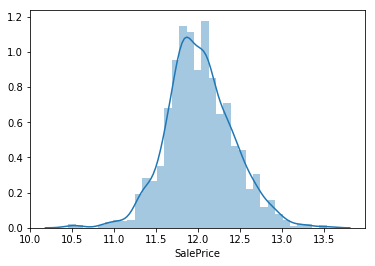

In [9]:
## Log transformation of labels
train_labels = np.log(train_labels)
## Now it looks much better
ax = sns.distplot(train_labels)

## Standardize numerical data

In [10]:
## Standardizing numeric features
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

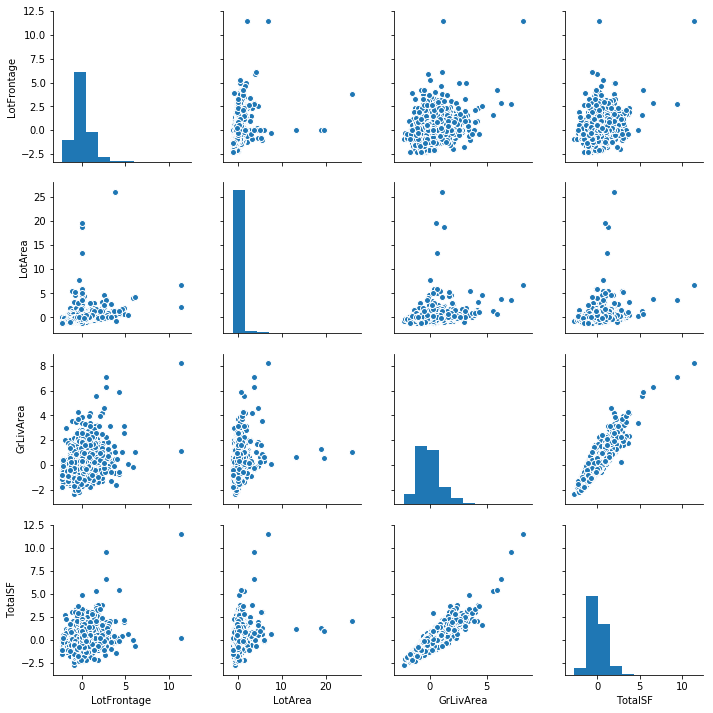

In [11]:
ax = sns.pairplot(numeric_features_standardized)

## Convert categorical data into dummies

In [12]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in features['Condition1']] + [x for x in features['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(conditions))),
                       index=features.index, columns=conditions)

for i, cond in enumerate(zip(features['Condition1'], features['Condition2'])):
    dummies.ix[i, cond] = 1

features = pd.concat([features, dummies.add_prefix('Condition_')], axis=1)
features.drop(['Condition1', 'Condition2'], axis=1, inplace=True)


In [13]:
dummies

PosA  PosN  RRNn  Feedr  RRAe  RRNe  Norm  Artery  RRAn
train 0      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1      0.0   0.0   0.0    1.0   0.0   0.0   1.0     0.0   0.0
      2      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      3      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      4      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      5      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      6      0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      7      0.0   1.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      8      0.0   0.0   0.0    0.0   0.0   0.0   1.0     1.0   0.0
      9      0.0   0.0   0.0    0.0   0.0   0.0   0.0     1.0   0.0
      10     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      11     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      12     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      13     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      14     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      15     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      16     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      17     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      18     0.0   0.0   0.0    0.0   1.0   0.0   1.0     0.0   0.0
      19     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      20     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      21     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      22     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      23     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      24     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      25     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      26     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      27     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      28     0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      29     0.0   0.0   1.0    1.0   0.0   0.0   0.0     0.0   0.0
...          ...   ...   ...    ...   ...   ...   ...     ...   ...
test  1429   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1430   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1431   0.0   0.0   0.0    1.0   0.0   0.0   1.0     0.0   0.0
      1432   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1433   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1434   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1435   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1436   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1437   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1438   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1439   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1440   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1441   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1442   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1443   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1444   0.0   0.0   0.0    0.0   0.0   0.0   1.0     1.0   0.0
      1445   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1446   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1447   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1448   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1449   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1450   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1451   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1452   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1453   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1454   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0
      1455   0.0   0.0   0.0    0.0   0.0   0.0   1.0     0.0   0.0


In [14]:
# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in features['Exterior1st']] + [x for x in features['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(exteriors))),
                       index=features.index, columns=exteriors)
for i, ext in enumerate(zip(features['Exterior1st'], features['Exterior2nd'])):
    dummies.ix[i, ext] = 1
features = pd.concat([features, dummies.add_prefix('Exterior_')], axis=1)
features.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

## obtain standardized dataset

In [15]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

## Splitting train and test features

In [16]:
### Splitting features
train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

## Splitting to train and validation sets

In [17]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)

In [18]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

## Elastic Net

In [19]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.8971429392845359
RMSE: 0.12132466795753699
Test
R2: 0.8952979539401235
RMSE: 0.1113566768153061


In [20]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.10)


## gradient boost

We use a lot of features and have many outliers. So I'm using max_features='sqrt' to reduce overfitting of my model. I also use loss='huber' because it more tolerant to outliers. All other hyper-parameters was chosen using GridSearchCV.

In [21]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9623722102925948
RMSE: 0.07550955546846387
Test
R2: 0.9037977333983689
RMSE: 0.1072631093885501


In [22]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


## Ensembling final model

My final ensemble model is an average of Gradient Boosting and Elastic Net predictions. But before that I retrained my models on all train data.

In [23]:
# Retraining models
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)

In [24]:
## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2

In [25]:
## Saving to CSV
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('D:/Github/machine learning/Kaggle/House Prices/submission.csv', index =False)    